# Prática 05 – Catálogo de Filmes

## Objetivo
Praticar compreensões avançadas (list, dict, set comprehension), tuplas, programação funcional e reduce.

## Dataset
`datasets/filmes_streaming.csv`

**Colunas:** Titulo, Genero, Ano, Duracao_Min, Avaliacao, Idioma, Assistido

## Referências do Curso
- **Notebook:** `Programacao_Intensiva_Ciencia_de_Dados.ipynb`
  - Seção 1.4 – Compreensões e Programação Funcional (list, dict, set comprehension, reduce)
  - Seção 1.2 – Estruturas de Dados Fundamentais (tuplas para dados imutáveis)
  - Seção 1.3 – Estruturas de Controle (loops e condicionais)
- **Documentação:** `documentacao_completa.md`
  - Seção 2.2 – Listas, Tuplas, Dicionários e Sets
  - Seção 2.4 – Programação Funcional (map, filter, reduce)

## Tarefas

### Nível Básico
1. Ler o CSV e armazenar os dados em uma lista de dicionários
2. Usando list comprehension, criar uma lista apenas com os títulos dos filmes assistidos
3. Usando set comprehension, extrair todos os gêneros e idiomas únicos
4. Calcular a avaliação média de todos os filmes


In [1]:
import pandas as pd

db = pd.read_csv("datasets/filmes_streaming.csv")
db.head()

,Titulo,Genero,Ano,Duracao_Min,Avaliacao,Idioma,Assistido
0,A Entidade,Terror,2022,107,2.4,Frances,Sim
1,Recomeco,Drama,1996,124,8.6,Espanhol,Sim
2,A Ultima Carta,Drama,2007,153,3.0,Frances,Sim
3,Sombras do Passado,Terror,2007,83,2.6,Coreano,Nao
4,O Estagiario Atrapalhado,Comedia,2011,124,1.1,Ingles,Nao


In [10]:
db[db["Assistido"] == "Sim"].iloc[:,0:3]

,Titulo,Genero,Ano
0,A Entidade,Terror,2022
1,Recomeco,Drama,1996
2,A Ultima Carta,Drama,2007
5,Viajantes do Tempo,Ficcao,1994
7,Zona de Combate,Acao,2000
8,O Ultimo Codigo,Ficcao,1993
10,Vizinhos Loucos,Comedia,2018
13,A Era Digital,Documentario,1993
15,Dimensao Paralela,Ficcao,2017
16,Alem das Montanhas,Drama,2022


In [12]:
generos = db["Genero"].unique()
idiomas = db["Idioma"].unique()

generos, idiomas

(<StringArray>
 ['Terror', 'Drama', 'Comedia', 'Ficcao', 'Acao', 'Documentario']
 Length: 6, dtype: str,
 <StringArray>
 ['Frances', 'Espanhol', 'Coreano', 'Ingles', 'Portugues', 'Japones']
 Length: 6, dtype: str)

In [13]:
db["Avaliacao"].mean()

np.float64(4.9628571428571435)

### Nível Intermediário
5. Usando dict comprehension, criar um dicionário {genero: quantidade_de_filmes}
6. Criar uma lista de tuplas (titulo, avaliacao) ordenada por avaliação (maior para menor)
7. Usar `filter` para encontrar filmes com avaliação acima de 8.0 e duração menor que 120 min
8. Usar `map` para criar uma lista formatada: "Titulo (Ano) - Nota: X.X"

<Axes: xlabel='Genero'>

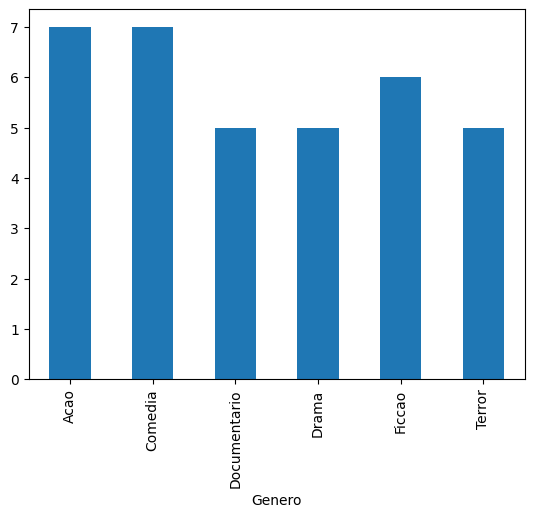

In [24]:
db_genero = db.groupby("Genero")["Titulo"].count()
db_genero.plot(kind="bar")


In [ ]:
db.sort_values("Avaliacao", ascending=False)[["Titulo", "Avaliacao"]].head(10)

,Titulo,Avaliacao
29,Furia nas Ruas,9.7
20,Raizes do Nordeste,9.7
1,Recomeco,8.6
16,Alem das Montanhas,8.5
27,O Golpe Perfeito,7.8
28,Cacada Mortal,7.8
5,Viajantes do Tempo,7.7
17,Operacao Resgate,7.7
25,Mundos Ocultos,7.5
33,Casamento Surpresa,6.8


In [36]:
db[db["Avaliacao"] > 8.0][db["Duracao_Min"] < 120][["Titulo", "Avaliacao", "Duracao_Min"]]

/tmp/ipykernel_98950/2394563404.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  db[db["Avaliacao"] > 8.0][db["Duracao_Min"] < 120][["Titulo", "Avaliacao", "Duracao_Min"]]


,Titulo,Avaliacao,Duracao_Min
20,Raizes do Nordeste,9.7,82


In [42]:
db[["Titulo","Ano","Avaliacao"]]
lista_de_filmes = []

for index, row in db.iterrows():

    lista_de_filmes.append((row['Titulo'], row['Ano'], row['Avaliacao']))


for filme in lista_de_filmes[:5]:
    print(f"{filme[0]} ({filme[1]}) - Nota: {filme[2]}")

A Entidade (2022) - Nota: 2.4
Recomeco (1996) - Nota: 8.6
A Ultima Carta (2007) - Nota: 3.0
Sombras do Passado (2007) - Nota: 2.6
O Estagiario Atrapalhado (2011) - Nota: 1.1


### Nível Avançado
9. Usar `reduce` para encontrar o filme com a maior avaliação (sem usar max())
10. Criar compreensão aninhada: para cada gênero, listar os filmes ordenados por avaliação
11. Implementar uma função de recomendação: dado um gênero favorito, retornar os 3 melhores filmes não assistidos daquele gênero
12. Calcular estatísticas por década (1990s, 2000s, 2010s, 2020s) usando dict comprehension e funções

In [44]:
from functools import reduce

# Converter para lista de tuplas (Titulo, Avaliacao)
filmes = list(zip(db["Titulo"], db["Avaliacao"]))

# Usar reduce para encontrar o maior
maior_filme = reduce(
    lambda x, y: x if x[1] > y[1] else y,
    filmes
)

print(maior_filme)

('Furia nas Ruas', 9.7)


In [63]:
titulo_por_genero = db.groupby("Genero")["Titulo"]
db[["Titulo","Genero", "Avaliacao"]].sort_values(["Genero","Avaliacao"], ascending=False)

,Titulo,Genero,Avaliacao
19,Sussurros na Escuridao,Terror,6.8
24,Pesadelo Sem Fim,Terror,6.7
30,O Ritual,Terror,5.2
3,Sombras do Passado,Terror,2.6
0,A Entidade,Terror,2.4
5,Viajantes do Tempo,Ficcao,7.7
32,Planeta Desconhecido,Ficcao,5.1
22,Horizonte Perdido,Ficcao,4.6
23,A Colonia,Ficcao,4.1
8,O Ultimo Codigo,Ficcao,2.4


In [64]:
db["Decada"] = (db["Ano"] // 10) * 10

estatisticas = (
    db.groupby("Decada")
      .agg(
          qtd_filmes=("Titulo", "count"),
          avaliacao_media=("Avaliacao", "mean"),
          avaliacao_max=("Avaliacao", "max"),
          avaliacao_min=("Avaliacao", "min"),
          duracao_media=("Duracao_Min", "mean")
      )
      .reset_index()
)

print(estatisticas)

   Decada  qtd_filmes  avaliacao_media  avaliacao_max  avaliacao_min  \
0    1990           7         5.857143            8.6            2.4   
1    2000           9         3.688889            6.8            1.5   
2    2010          14         5.185714            9.7            1.1   
3    2020           5         5.380000            8.5            2.4   

   duracao_media  
0     119.571429  
1     125.666667  
2     138.214286  
3     133.800000  
